# B. Learning curves

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("train_df_after_A.csv")
train_df.drop(axis=1,columns=['Unnamed: 0'],inplace = True)
train_df

,prompt_id,text,generated,max_similarity,avg_similarity,Predictability
0,0,Cars. Cars have been around since they became ...,0,NaN,NaN,NaN
1,0,Transportation is a large necessity in most co...,0,NaN,NaN,NaN
2,0,Americas love affair with its vehicles seems t...,0,NaN,NaN,NaN
3,0,How often do you ride in a car Do you drive a ...,0,NaN,NaN,NaN
4,0,Cars are a wonderful thing. They are perhaps o...,0,NaN,NaN,NaN
...,...,...,...,...,...,...
2629,1,letter_to_state_senator \n recipient Senator L...,1,0.020836,0.090249,1.000000
2630,0,Limiting car usage offers numerous advantages ...,1,0.306796,0.092755,1.000000
2631,1,letter \n recipient State Senator\n address St...,1,0.008905,0.104442,0.999992
2632,0,Due to the character limit I cannot provide a ...,1,0.050336,0.019247,0.999998


## Keep a test set apart and split the train data to portions (10%, …, 90%, 100%). Train your best performing algorithm on each portion. Assess each trained instance on the test (the same across portions) and on the training data.

In [3]:
X = train_df.text
y = train_df.generated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [4]:
def cross_val(X, y, X_test_tot, y_test_tot, test_per):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_per, random_state=42)
    
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    X_train_array = X_train_tfidf.toarray()
    X_test_array = X_test_tfidf.toarray()
    
    svm_model = LinearSVC(random_state=42)
    svm_model.fit(X_train_array, y_train)
    
    y_pred = svm_model.predict(X_test_array)
    mse_val = mean_squared_error(y_test, y_pred)
    
    X_test_tot_tfidf = tfidf_vectorizer.transform(X_test_tot)
    X_test_tot_array = X_test_tot_tfidf.toarray()
    
    y_pred_tot = svm_model.predict(X_test_tot_array)
    mse_test = mean_squared_error(y_test_tot, y_pred_tot)
    
    return(mse_val,mse_test)

## Visualise the two curves (train, test), based on an appropriate evaluation measure, diagnosing weak and strong points of your classifier (a.k.a. the learning curves).

In [5]:
mse_val_list = []
mse_test_list = []
for i in range(1, 10):
    percentage = i / 10.0
    mse_val, mse_test = cross_val(X_train,y_train,X_test,y_test,percentage)
    mse_val_list.append(mse_val)
    mse_test_list.append(mse_test)

In [6]:
mse_val_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0006779661016949153,
 0.0011862396204033216,
 0.0005271481286241434]

In [7]:
mse_test_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0018975332068311196,
 0.0018975332068311196,
 0.0018975332068311196]

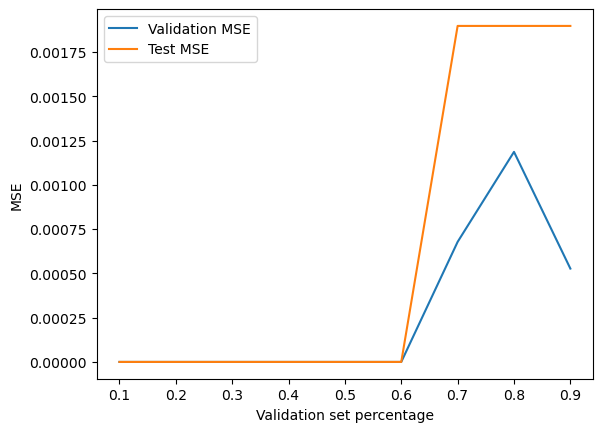

In [8]:
import matplotlib.pyplot as plt

x_ticks = np.arange(0.1, 1, 0.1)
plt.plot(x_ticks, mse_val_list, label='Validation MSE')
plt.plot(x_ticks, mse_test_list, label='Test MSE')
plt.xlabel('Validation set percentage')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Add a regressor to the plot, to estimate how many more texts should you generate to reach the "best" performance.  

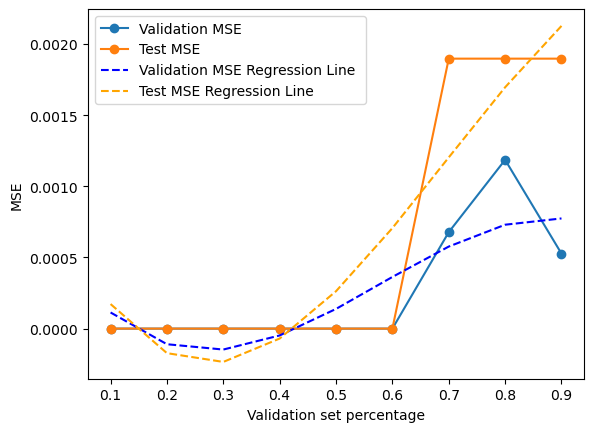

In [9]:
x_ticks = np.arange(0.1, 1, 0.1)
plt.plot(x_ticks, mse_val_list,'-o', label='Validation MSE')
plt.plot(x_ticks, mse_test_list,'-o', label='Test MSE')

coefficients1 = np.polyfit(x_ticks, mse_val_list, 3)
regression_line1 = np.polyval(coefficients1, x_ticks)
plt.plot(x_ticks, regression_line1, label='Validation MSE Regression Line ', linestyle='--',color='blue')

coefficients2 = np.polyfit(x_ticks, mse_test_list, 3)
regression_line2 = np.polyval(coefficients2, x_ticks)
plt.plot(x_ticks, regression_line2, label='Test MSE Regression Line ', linestyle='--',color='orange')

plt.xlabel('Validation set percentage')
plt.ylabel('MSE')
plt.legend()

plt.show()
